In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import glob
import torchvision.transforms
import random
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

%load_ext autoreload
%autoreload 2
from documents.load_data import *
from Model.Deep_CNN import *

In [2]:
train_loader, test_loader, val_loader = loader()(subject = 1,
                                             batch_size= 30,
                                             num_validation =37)


Train data shape:  (200, 22, 1000)
Train labels shape:  (200,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)


In [6]:
criteria = F.cross_entropy

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target).long()
        optimizer.zero_grad()
        output = model(data)
        loss = criteria(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    

def test(test_loader=test_loader, mode = 'val'):
    # train mode to get the train accuracy 
    # val mode to get the validation accuracy
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = Variable(data), Variable(target).long()
            output = model(data)
            test_loss += criteria(output, target, reduction='sum').item() # sum up batch loss
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.data.view_as(pred)).long().cpu().sum().item()
        
    test_loss /= len(test_loader.dataset)
    if mode == 'train':
        print('train loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        

    else:
        print('validation loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    
    return [test_loss,correct / len(test_loader.dataset)]

In [7]:
def main_train(epoches = 8):
    stats = {}
    stats['train'] = []
    stats['val']  = []

    epoches = range(epoches)
    for epoch in epoches:
        train(epoch)
        stats['train'].append(test(train_loader, mode='train'))
        stats['val'].append(test(val_loader, mode='val'))

    print('Test set result:')
    test(test_loader, mode = 'val')

    stats['val']  = np.array(stats['val'])
    stats['train'] = np.array(stats['train'])

    fig, ax = plt.subplots(1, 2,figsize = (8,4))
    ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

    ax[0].legend(['validation','train'])
    ax[0].set_title('loss')

    ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

    ax[1].legend(['validation','train'])
    ax[1].set_title('accuracy')

Train data shape:  (199, 22, 1000)
Train labels shape:  (199,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/199 (0%)]	Loss: 1.410665
Train Epoch: 0 [150/199 (71%)]	Loss: 1.479941
train loss: 1.5255, Accuracy: 50/199 (25%)
validation loss: 1.5907, Accuracy: 9/38 (24%)

Train Epoch: 1 [0/199 (0%)]	Loss: 0.667787
Train Epoch: 1 [150/199 (71%)]	Loss: 0.774965
train loss: 1.0778, Accuracy: 88/199 (44%)
validation loss: 1.4901, Accuracy: 10/38 (26%)

Train Epoch: 2 [0/199 (0%)]	Loss: 0.625889
Train Epoch: 2 [150/199 (71%)]	Loss: 0.430393
train loss: 0.3606, Accuracy: 191/199 (96%)
validation loss: 0.9382, Accuracy: 18/38 (47%)

Train Epoch: 3 [0/199 (0%)]	Loss: 0.297621
Train Epoch: 3 [150/199 (71%)]	Loss: 0.275030
train loss: 0.1577, Accuracy: 199/199 (100%)
validation loss: 0.7838, Accuracy: 22/38 (58%)

Train Epoch: 4 [0/199 (0%)]	Loss: 0.149021
Train Epoch: 4 [150/199 (71%)]	Loss: 0.103

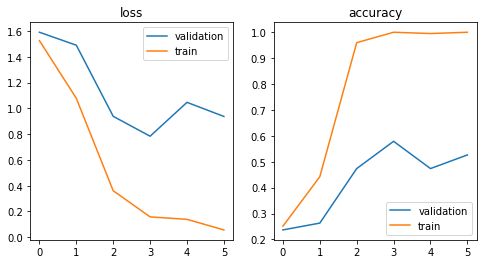

In [30]:
train_loader, test_loader, val_loader,_ = loader()(subject= 1,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Deep()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

Train data shape:  (199, 22, 1000)
Train labels shape:  (199,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)
Train Epoch: 0 [0/199 (0%)]	Loss: 1.339770
Train Epoch: 0 [150/199 (71%)]	Loss: 1.203173
train loss: 1.3085, Accuracy: 85/199 (43%)
validation loss: 1.3865, Accuracy: 12/37 (32%)

Train Epoch: 1 [0/199 (0%)]	Loss: 0.965934
Train Epoch: 1 [150/199 (71%)]	Loss: 0.829180
train loss: 0.8373, Accuracy: 164/199 (82%)
validation loss: 1.3846, Accuracy: 9/37 (24%)

Train Epoch: 2 [0/199 (0%)]	Loss: 0.604316
Train Epoch: 2 [150/199 (71%)]	Loss: 0.396797
train loss: 0.3929, Accuracy: 198/199 (99%)
validation loss: 1.4211, Accuracy: 10/37 (27%)

Train Epoch: 3 [0/199 (0%)]	Loss: 0.253098
Train Epoch: 3 [150/199 (71%)]	Loss: 0.250152
train loss: 0.1750, Accuracy: 199/199 (100%)
validation loss: 1.4262, Accuracy: 14/37 (38%)

Train Epoch: 4 [0/199 (0%)]	Loss: 0.124646
Train Epoch: 4 [150/199 (71%)]	Loss: 0.09

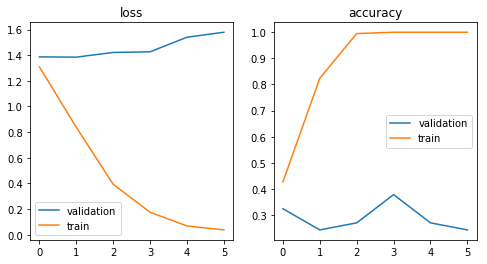

In [10]:
train_loader, test_loader, val_loader, _ = loader()(subject= 2,
                                             batch_size= 30,
                                             num_validation =37)
model = CNN_Deep()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

Train data shape:  (199, 22, 1000)
Train labels shape:  (199,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)
Train Epoch: 0 [0/199 (0%)]	Loss: 1.663046
Train Epoch: 0 [150/199 (71%)]	Loss: 1.292498
train loss: 1.3352, Accuracy: 84/199 (42%)
validation loss: 1.4159, Accuracy: 8/37 (22%)

Train Epoch: 1 [0/199 (0%)]	Loss: 0.784382
Train Epoch: 1 [150/199 (71%)]	Loss: 0.831378
train loss: 0.9680, Accuracy: 109/199 (55%)
validation loss: 1.3953, Accuracy: 14/37 (38%)

Train Epoch: 2 [0/199 (0%)]	Loss: 0.422808
Train Epoch: 2 [150/199 (71%)]	Loss: 0.379685
train loss: 0.5119, Accuracy: 168/199 (84%)
validation loss: 1.6802, Accuracy: 10/37 (27%)

Train Epoch: 3 [0/199 (0%)]	Loss: 0.181044
Train Epoch: 3 [150/199 (71%)]	Loss: 0.156147
train loss: 0.2533, Accuracy: 195/199 (98%)
validation loss: 1.3262, Accuracy: 17/37 (46%)

Train Epoch: 4 [0/199 (0%)]	Loss: 0.118462
Train Epoch: 4 [150/199 (71%)]	Loss: 0.092

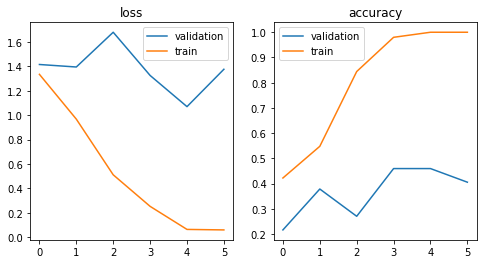

In [11]:
train_loader, test_loader, val_loader, _ = loader()(subject= 3,
                                             batch_size= 30,
                                             num_validation =37)
model = CNN_Deep()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

Train data shape:  (197, 22, 1000)
Train labels shape:  (197,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)
Train Epoch: 0 [0/197 (0%)]	Loss: 1.499920
Train Epoch: 0 [150/197 (71%)]	Loss: 1.466218
train loss: 1.3275, Accuracy: 57/197 (29%)
validation loss: 1.3797, Accuracy: 10/37 (27%)

Train Epoch: 1 [0/197 (0%)]	Loss: 0.914644
Train Epoch: 1 [150/197 (71%)]	Loss: 0.821127
train loss: 0.8516, Accuracy: 153/197 (78%)
validation loss: 1.3589, Accuracy: 13/37 (35%)

Train Epoch: 2 [0/197 (0%)]	Loss: 0.470249
Train Epoch: 2 [150/197 (71%)]	Loss: 0.616575
train loss: 0.3564, Accuracy: 197/197 (100%)
validation loss: 1.3783, Accuracy: 17/37 (46%)

Train Epoch: 3 [0/197 (0%)]	Loss: 0.226003
Train Epoch: 3 [150/197 (71%)]	Loss: 0.130384
train loss: 0.1351, Accuracy: 197/197 (100%)
validation loss: 1.4969, Accuracy: 17/37 (46%)

Train Epoch: 4 [0/197 (0%)]	Loss: 0.111477
Train Epoch: 4 [150/197 (71%)]	Loss: 0.

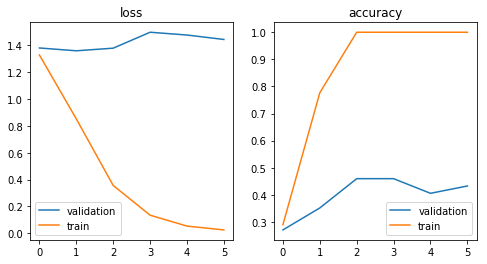

In [12]:
train_loader, test_loader, val_loader, _ = loader()(subject= 4,
                                             batch_size= 30,
                                             num_validation =37)
model = CNN_Deep()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (47, 22, 1000)
test labels shape:  (47,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.380454
Train Epoch: 0 [150/198 (71%)]	Loss: 1.356787
train loss: 1.3268, Accuracy: 58/198 (29%)
validation loss: 1.3796, Accuracy: 10/37 (27%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.054073
Train Epoch: 1 [150/198 (71%)]	Loss: 0.798688
train loss: 0.8478, Accuracy: 143/198 (72%)
validation loss: 1.2990, Accuracy: 15/37 (41%)

Train Epoch: 2 [0/198 (0%)]	Loss: 0.470016
Train Epoch: 2 [150/198 (71%)]	Loss: 0.622971
train loss: 0.3906, Accuracy: 193/198 (97%)
validation loss: 1.1808, Accuracy: 18/37 (49%)

Train Epoch: 3 [0/198 (0%)]	Loss: 0.314974
Train Epoch: 3 [150/198 (71%)]	Loss: 0.230681
train loss: 0.2611, Accuracy: 192/198 (97%)
validation loss: 1.2660, Accuracy: 17/37 (46%)

Train Epoch: 4 [0/198 (0%)]	Loss: 0.195162
Train Epoch: 4 [150/198 (71%)]	Loss: 0.10

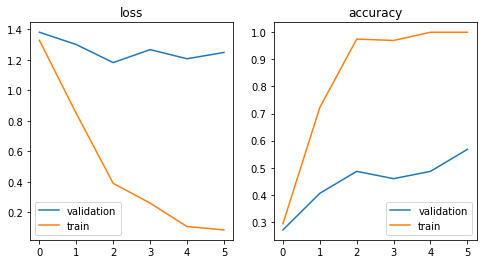

In [13]:
train_loader, test_loader, val_loader, _ = loader()(subject= 5,
                                             batch_size= 30,
                                             num_validation =37)
model = CNN_Deep()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

Train data shape:  (199, 22, 1000)
Train labels shape:  (199,)
test data shape:  (49, 22, 1000)
test labels shape:  (49,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)
Train Epoch: 0 [0/199 (0%)]	Loss: 1.421037
Train Epoch: 0 [150/199 (71%)]	Loss: 1.419676
train loss: 1.3737, Accuracy: 48/199 (24%)
validation loss: 1.4371, Accuracy: 9/37 (24%)

Train Epoch: 1 [0/199 (0%)]	Loss: 0.668997
Train Epoch: 1 [150/199 (71%)]	Loss: 0.650416
train loss: 0.7696, Accuracy: 166/199 (83%)
validation loss: 1.3704, Accuracy: 15/37 (41%)

Train Epoch: 2 [0/199 (0%)]	Loss: 0.322451
Train Epoch: 2 [150/199 (71%)]	Loss: 0.310068
train loss: 0.3053, Accuracy: 198/199 (99%)
validation loss: 1.2882, Accuracy: 18/37 (49%)

Train Epoch: 3 [0/199 (0%)]	Loss: 0.194601
Train Epoch: 3 [150/199 (71%)]	Loss: 0.141483
train loss: 0.1059, Accuracy: 199/199 (100%)
validation loss: 1.2640, Accuracy: 16/37 (43%)

Train Epoch: 4 [0/199 (0%)]	Loss: 0.110962
Train Epoch: 4 [150/199 (71%)]	Loss: 0.06

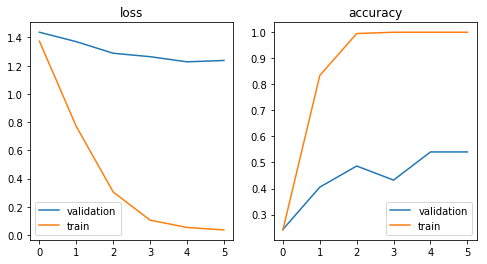

In [14]:
train_loader, test_loader, val_loader, _ = loader()(subject= 6,
                                             batch_size= 30,
                                             num_validation =37)
model = CNN_Deep()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

Train data shape:  (201, 22, 1000)
Train labels shape:  (201,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)
Train Epoch: 0 [0/201 (0%)]	Loss: 1.516015
Train Epoch: 0 [150/201 (71%)]	Loss: 1.280157
train loss: 1.3289, Accuracy: 105/201 (52%)
validation loss: 1.4234, Accuracy: 10/37 (27%)

Train Epoch: 1 [0/201 (0%)]	Loss: 0.555983
Train Epoch: 1 [150/201 (71%)]	Loss: 0.448522
train loss: 0.6425, Accuracy: 180/201 (90%)
validation loss: 1.1343, Accuracy: 21/37 (57%)

Train Epoch: 2 [0/201 (0%)]	Loss: 0.266757
Train Epoch: 2 [150/201 (71%)]	Loss: 0.276529
train loss: 0.1584, Accuracy: 201/201 (100%)
validation loss: 0.9899, Accuracy: 23/37 (62%)

Train Epoch: 3 [0/201 (0%)]	Loss: 0.109927
Train Epoch: 3 [150/201 (71%)]	Loss: 0.137246
train loss: 0.0960, Accuracy: 201/201 (100%)
validation loss: 0.8710, Accuracy: 27/37 (73%)

Train Epoch: 4 [0/201 (0%)]	Loss: 0.067437
Train Epoch: 4 [150/201 (71%)]	Loss: 0

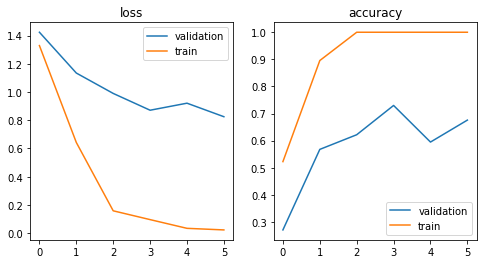

In [15]:
train_loader, test_loader, val_loader, _ = loader()(subject= 7,
                                             batch_size= 30,
                                             num_validation =37)
model = CNN_Deep()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

Train data shape:  (195, 22, 1000)
Train labels shape:  (195,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)
Train Epoch: 0 [0/195 (0%)]	Loss: 1.446780
Train Epoch: 0 [150/195 (71%)]	Loss: 1.367423
train loss: 1.3311, Accuracy: 117/195 (60%)
validation loss: 1.3728, Accuracy: 14/37 (38%)

Train Epoch: 1 [0/195 (0%)]	Loss: 0.754260
Train Epoch: 1 [150/195 (71%)]	Loss: 0.698920
train loss: 0.6361, Accuracy: 175/195 (90%)
validation loss: 1.0037, Accuracy: 20/37 (54%)

Train Epoch: 2 [0/195 (0%)]	Loss: 0.369198
Train Epoch: 2 [150/195 (71%)]	Loss: 0.419135
train loss: 0.2345, Accuracy: 192/195 (98%)
validation loss: 0.8797, Accuracy: 23/37 (62%)

Train Epoch: 3 [0/195 (0%)]	Loss: 0.206185
Train Epoch: 3 [150/195 (71%)]	Loss: 0.163745
train loss: 0.1061, Accuracy: 195/195 (100%)
validation loss: 0.9221, Accuracy: 21/37 (57%)

Train Epoch: 4 [0/195 (0%)]	Loss: 0.079712
Train Epoch: 4 [150/195 (71%)]	Loss: 0.

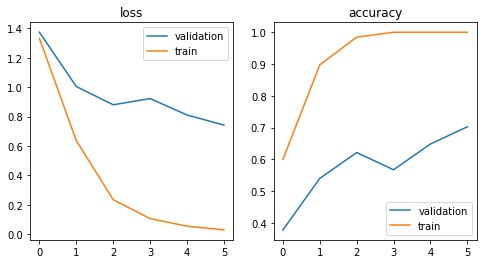

In [16]:
train_loader, test_loader, val_loader, _ = loader()(subject= 8,
                                             batch_size= 30,
                                             num_validation =37)
model = CNN_Deep()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

Train data shape:  (194, 22, 1000)
Train labels shape:  (194,)
test data shape:  (47, 22, 1000)
test labels shape:  (47,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)
Train Epoch: 0 [0/194 (0%)]	Loss: 1.421951
Train Epoch: 0 [150/194 (71%)]	Loss: 1.033531
train loss: 1.5218, Accuracy: 48/194 (25%)
validation loss: 1.5936, Accuracy: 9/37 (24%)

Train Epoch: 1 [0/194 (0%)]	Loss: 0.637004
Train Epoch: 1 [150/194 (71%)]	Loss: 0.439683
train loss: 0.7219, Accuracy: 146/194 (75%)
validation loss: 1.1891, Accuracy: 19/37 (51%)

Train Epoch: 2 [0/194 (0%)]	Loss: 0.320364
Train Epoch: 2 [150/194 (71%)]	Loss: 0.438328
train loss: 0.2862, Accuracy: 186/194 (96%)
validation loss: 0.9522, Accuracy: 20/37 (54%)

Train Epoch: 3 [0/194 (0%)]	Loss: 0.179246
Train Epoch: 3 [150/194 (71%)]	Loss: 0.130185
train loss: 0.1173, Accuracy: 194/194 (100%)
validation loss: 0.8378, Accuracy: 23/37 (62%)

Train Epoch: 4 [0/194 (0%)]	Loss: 0.074983
Train Epoch: 4 [150/194 (71%)]	Loss: 0.07

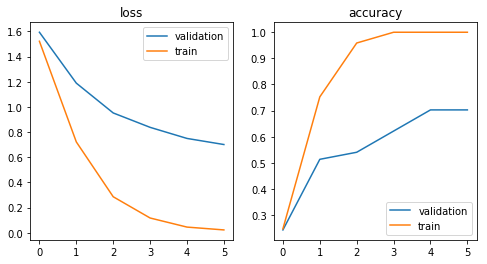

In [17]:
train_loader, test_loader, val_loader, _ = loader()(subject= 9,
                                             batch_size= 30,
                                             num_validation =37)
model = CNN_Deep()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

Train data shape:  (1782, 22, 1000)
Train labels shape:  (1782,)
test data shape:  (443, 22, 1000)
test labels shape:  (443,)
Validation data shape:  (333, 22, 1000)
Validation labels shape:  (333,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
Train Epoch: 0 [0/1782 (0%)]	Loss: 1.398256
Train Epoch: 0 [150/1782 (8%)]	Loss: 1.510502
Train Epoch: 0 [300/1782 (17%)]	Loss: 1.404262
Train Epoch: 0 [450/1782 (25%)]	Loss: 1.365677
Train Epoch: 0 [600/1782 (33%)]	Loss: 1.325719
Train Epoch: 0 [750/1782 (42%)]	Loss: 1.253367
Train Epoch: 0 [900/1782 (50%)]	Loss: 1.235472
Train Epoch: 0 [1050/1782 (58%)]	Loss: 1.552813
Train Epoch: 0 [1200/1782 (67%)]	Loss: 1.199682
Train Epoch: 0 [1350/1782 (75%)]	Loss: 1.287029
Train Epoch: 0 [1500/1782 (83%)]	Loss: 1.240403
Train Epoch: 0 [1650/1782 (92%)]	Loss: 1.567757
train loss: 1.0580, Accuracy: 1008/1782 (57%)
validation loss: 1.2147, Accuracy: 147/333 (44%)

Train Epoch: 1 [0/1782 (0%)]	Loss: 0.930119
Train Epoch: 1 [150/1782 (8%)]	Los

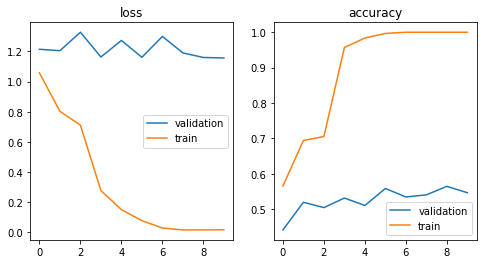

In [28]:
train_loader, test_loader, val_loader, test_loaders = loader()(subject = "ALL",
                                                            batch_size = 30,
                                                            num_validation = 37)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    break
model = CNN_Deep()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)
for i in range(9):
    print('This is test set result for subject{}:'.format(i+1))
    test(test_loaders[i], mode = 'val')